# Credit Card Fraud Detection (training how to implement PCA)

Visto que o meu projeto final da disciplina de Aprendizado de Máquina consiste em uma detecção de fraude de cartões de crédito, decidi começar a mexer em um dataset menor antes de partir para um mais complexo. 

Sendo assim, nesse notebook, será feita uma análise simples dos parâmetros envolvidos em fraudes de cartão de crédito, além de predições extremamente simples, somente para fins de estudo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Loading the Data

In [2]:
df_cc = pd.read_csv("creditcard.csv")
df_cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df_cc.describe()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## EDA - Exploratory Data Analysis

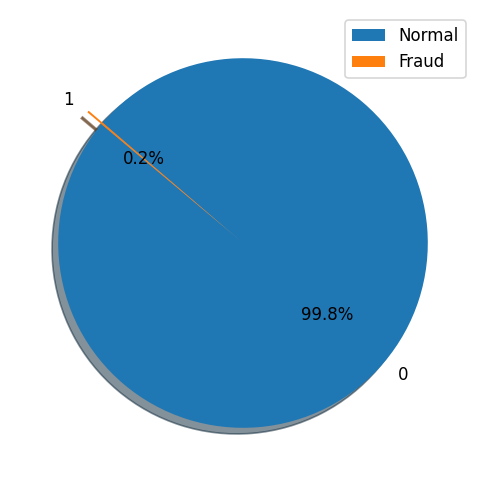

In [7]:
# Frauds and Non-Frauds
plt.figure(figsize=(8, 5), dpi=120)
df_cc.Class.value_counts().plot(kind="pie", explode=[0, 0.1], shadow=True, startangle=140, autopct='%1.1f%%')
plt.legend(labels=['Normal','Fraud'])
plt.axis('off')
plt.show()

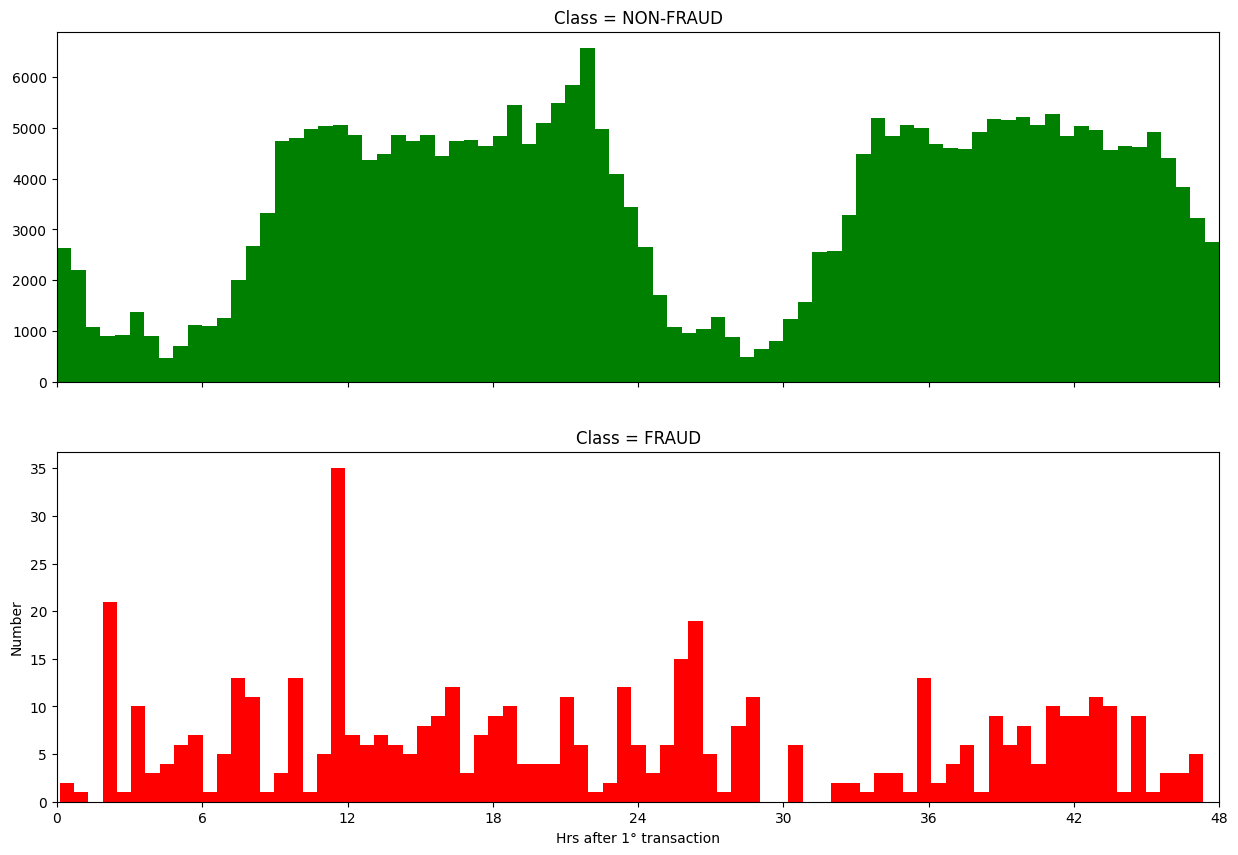

In [8]:
# Relation between fraud and non-frauds transactions
value = df_cc["Class"].value_counts().index
figure, (non_fraud, fraud) = plt.subplots(2,1, sharex=True, figsize=(15, 10))

non_fraud.hist((df_cc["Time"]/60/60)[df_cc["Class"] == 0], bins=80, color="g")
non_fraud.set_title("Class = NON-FRAUD")

fraud.hist((df_cc["Time"]/60/60)[df_cc["Class"] ==1 ], bins=80, color="r")
fraud.set_title("Class = FRAUD")

plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel("Hrs after 1° transaction")
plt.ylabel('Number')

plt.show()

## Cleaning Data


In [9]:
df_cc_copy = df_cc.copy()

In [10]:
df_cc_copy.isna().sum().mean()

0.0

In [11]:
# Duplicating the data
print(f"Non-Frauds: {df_cc_copy[df_cc_copy.Class == 0].duplicated().sum()}")
print(f"Frauds: {df_cc_copy[df_cc_copy.Class == 1].duplicated().sum()}")
print("*" * 100)

# Drop
df_cc_copy.drop_duplicates(inplace=True)
print("Dropped Succesfully")
print("*" * 100)

# Check
print(f"Non-Frauds: {df_cc_copy[df_cc_copy.Class == 0].duplicated().sum()}")
print(f"Frauds: {df_cc_copy[df_cc_copy.Class == 1].duplicated().sum()}")

Non-Frauds: 1062
Frauds: 19
****************************************************************************************************
Dropped Succesfully
****************************************************************************************************
Non-Frauds: 0
Frauds: 0


## Preprocessing

In [12]:
# PCA transformations
pca = PCA(n_components = 2)
columns = df_cc_copy[["Time", "Amount"]]
pca.fit(columns)
df_cc_copy[["Time", "Amount"]] = pca.transform(columns)

In [13]:
# Scaling with the Robust Scaler
transformer = RobustScaler().fit(columns)
df_cc_copy[["Time", "Amount"]] = transformer.transform(columns)

## Splitting the dataset

In [14]:
X = df_cc_copy.drop('Class', axis = 1)
y = df_cc_copy['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Predicting with different models

### Naive Bayes

In [15]:
nb = GaussianNB()
nb.fit(X_train , y_train)

nb_score = nb.score(X_test , y_test).round(5)

### Decision Tree

In [16]:
dt =DecisionTreeClassifier(max_features=15, 
                           max_depth=10)
dt.fit(X_train , y_train)

dt_score = dt.score(X_test , y_test).round(5)

### Random Forest

In [17]:
rf = RandomForestClassifier(max_features=6,
                              max_depth=6)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test).round(5)

### Logistic Regression

In [18]:
logreg = LogisticRegression(C = 10, 
                            max_iter=2000)
logreg.fit(X_train , y_train)

logreg_score = logreg.score(X_test , y_test).round(5)

### KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_score = knn.score(X_test, y_test).round(5)

# Testing diff metrics 

* Accuracy
* F-1 Score
* Precision Score
* Recall Score

In [20]:
model_comparison = {}
models_names = ["Decision Tree", "Naive Bayers", "Random Forest", "KNN", "Logistic Regression"]
models = [nb, dt, rf, logreg, knn]
results = {}

# Predictions
for model in models:
    results[str(model).split("(")[0]] = [model.predict(X_test)]        

In [21]:
for model, preds in results.items():
    model_comparison[model] = [
                            round(accuracy_score(y_test, pd.DataFrame(preds).T), 2),
                            round(f1_score(y_test, pd.DataFrame(preds).T,average='weighted'), 2),
                            round(precision_score(y_test, pd.DataFrame(preds).T), 2),
                            round(recall_score(y_test, pd.DataFrame(preds).T), 2),
    ]

In [24]:
results_df = pd.DataFrame(model_comparison, index=["Accuracy", "F-1 Score", "Precision Score", "Recall Score"])
results_df.style.format("{:.2%}").background_gradient(cmap='Blues')

# Jinja2: biblioteca de templates da web em Python

,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Accuracy,98.00%,100.00%,100.00%,100.00%,100.00%
F-1 Score,99.00%,100.00%,100.00%,100.00%,100.00%
Precision Score,5.00%,91.00%,95.00%,86.00%,92.00%
Recall Score,79.00%,69.00%,72.00%,54.00%,69.00%


**A maioria dos scores aparentemente não faz sentido para a previsão, contudo, como o objetivo do estudo é somente a implementação destes, temos um resultado OK**